In [277]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [278]:
data= pd.read_json("../input/pasos.json",encoding='utf-8')
data.head(10)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


In [279]:
data.dtypes

location    object
name        object
province    object
dtype: object

In [280]:
data.shape

(252, 3)

Identificación de pasos duplicados a partir de las coordenadas

In [281]:
data.location.value_counts()[data.location.value_counts()>1]


[-32.825277, -70.0729456]     4
[-34.8150044, -58.5370171]    3
[-45.7894354, -67.4696871]    3
[-37.9341161, -57.5745361]    2
[-24.8442303, -65.4806004]    2
[-40.1133859, -71.6806031]    2
[-34.2405546, -69.8305781]    2
[-26.8358881, -65.1105502]    2
[-31.7088748, -60.8100047]    2
[-27.7575812, -64.3032]       2
[-31.5718139, -68.4247562]    2
[-27.294403, -54.227733]      2
[-26.216682, -58.2327793]     2
[-29.3838767, -66.7963367]    2
[-34.5580305, -58.4191975]    2
[-32.9168872, -60.7825792]    2
[-27.5063076, -64.9352342]    2
[-34.4747015, -58.6145741]    2
[-51.6117879, -69.3085038]    2
[-32.7161131, -60.7314613]    2
[-41.1467101, -71.1642129]    2
[-25.3726325, -57.6514475]    2
[-31.3154367, -64.2145085]    2
[-23.2375, -67.076389]        2
[-34.1176359, -57.9897668]    2
[-46.2752267, -71.7270022]    2
[-29.1156361, -56.554963]     2
[-27.5711373, -54.6822256]    2
[-32.8278642, -68.8006789]    2
[-38.9521333, -68.142673]     2
Name: location, dtype: int64

In [294]:
U, Indices = np.unique(data.location, return_index=True)
data_unic=data.iloc[Indices]
data_unic.shape

(218, 3)

In [283]:
pd.Series(data.location,dtype=str).describe()

count                           252
unique                          218
top       [-32.825277, -70.0729456]
freq                              4
Name: location, dtype: object

In [284]:
data[data.index.duplicated()]

,location,name,province


In [285]:
data_unic.location.value_counts().max()

1

In [286]:
data_unic

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego
229,"[-53.7856913, -67.7582472]",AERO RIO GRANDE,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
243,"[-53.657868, -68.6045084]",PASO ALFA CULLEN,Tierra del Fuego
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
13,"[-52.3274981, -68.3692192]",PASO CABO VIRGENES,Santa Cruz


Como la provincia de Córdoba está en el dataset con acento y sin acento, y la provincia de Neuquén está con Mayuscula y Minuscula. Creamos una función para adecuar el formato 

In [295]:
from unicodedata import normalize

In [307]:
def normalize_text ( text ):
  return normalize(u'NFKD', text.capitalize()).encode('ascii', 'ignore').decode('utf8')

data_unic['provincia'] = data_unic['province'].apply(normalize_text)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,location,name,province,provincia
119,"[-36.5938265, -64.2811118]",AERO SANTA ROSA,Córdoba,Cordoba
126,"[-32.3683712, -70.2314398]",PASO VALLE HERMOSO,Cordoba,Cordoba
122,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba,Cordoba


In [312]:
data_unic[data_unic['provincia'] =='Cordoba']

,location,name,province,provincia
119,"[-36.5938265, -64.2811118]",AERO SANTA ROSA,Córdoba,Cordoba
126,"[-32.3683712, -70.2314398]",PASO VALLE HERMOSO,Cordoba,Cordoba
122,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba,Cordoba


In [313]:
data_unic[data_unic['provincia'] =='Neuquen']

,location,name,province,provincia
40,"[-40.6999981, -71.9508855]",PASO CARDENAL ANTONIO SAMORE,Neuquen,Neuquen
46,"[-40.1178721, -71.3897086]",AERO SAN MARTIN DE LOS ANDES,Neuquen,Neuquen
45,"[-40.1133859, -71.6806031]",PASO HUA - HUM,Neuquen,Neuquen
55,"[-39.8255556, -71.1344162]",PASO COPAHUE,Neuquen,Neuquen
47,"[-39.5815859, -71.4673476]",PASO MAMUIL MALAL,Neuquen,Neuquen
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen,Neuquen
48,"[-38.833809, -71.2745511]",PASO ICALMA,NEUQUEN,Neuquen
51,"[-38.6678217, -70.8484044]",PASO PINO HACHADO,Neuquen,Neuquen
56,"[-37.4529913, -71.123967]",PASO PICHACHEN,Neuquen,Neuquen


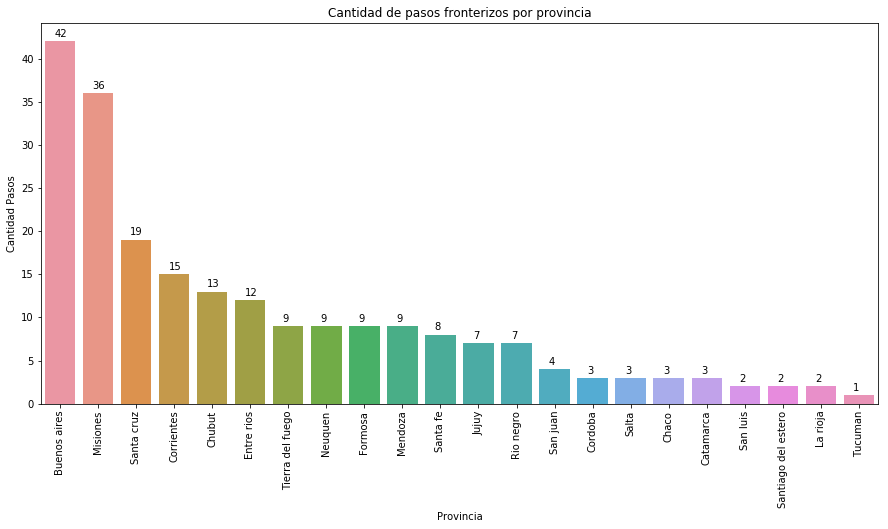

In [305]:
plt.figure(figsize=(15, 7))
g = sns.countplot(x="provincia", data=data_unic, order = data_unic['provincia'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Provincia")
plt.ylabel("Cantidad Pasos")
plt.title("Cantidad de pasos fronterizos por provincia")

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+0.25, height+.5, (height))

    